In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Fertilizer1.csv")
df.head()

,Temparature,Humidity,Crop Type,Nitrogen,Potassium,Phosphorous,pH,Rainfall,Fertilizer Name
0,26,52,Maize,37,0,0,7.210306,8.066667,Urea
1,29,52,Sugarcane,12,0,36,8.735449,34.666667,DAP
2,34,65,Cotton,7,9,30,7.842703,133.133333,14-35-14
3,32,62,Tobacco,22,0,20,5.275002,178.800000,28-28
4,28,54,Paddy,35,0,0,5.895636,18.133333,Urea


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Defining function for Continuous and catogorical variable
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = df['Fertilizer Name'])
    
def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer Name'], ax=axes[1])

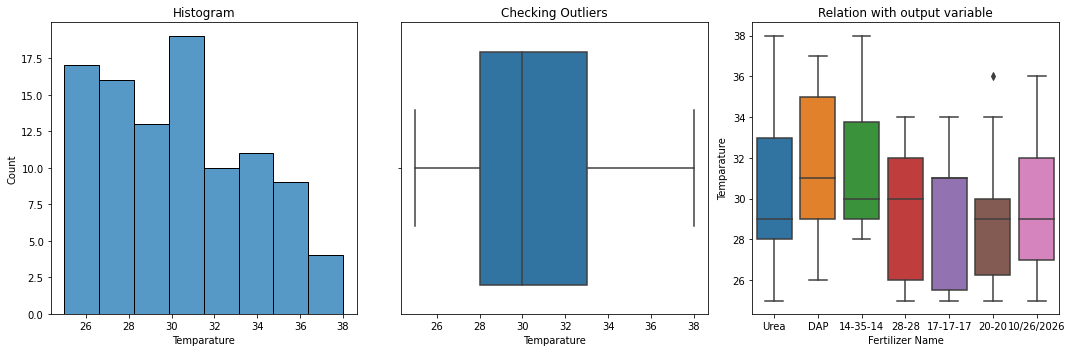

In [ ]:
#EDA - Temparature variable
plot_conti(df['Temparature'])  #change temp to others

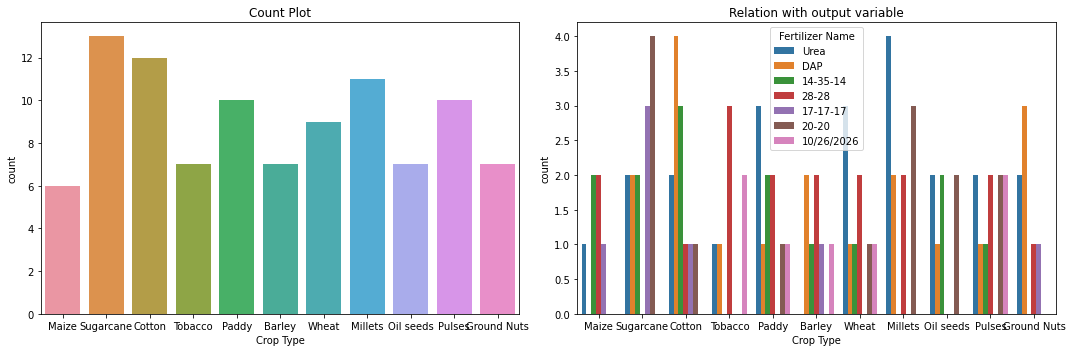

In [ ]:
#EDA - Crop_Type variable
plot_cato(df['Crop Type'])

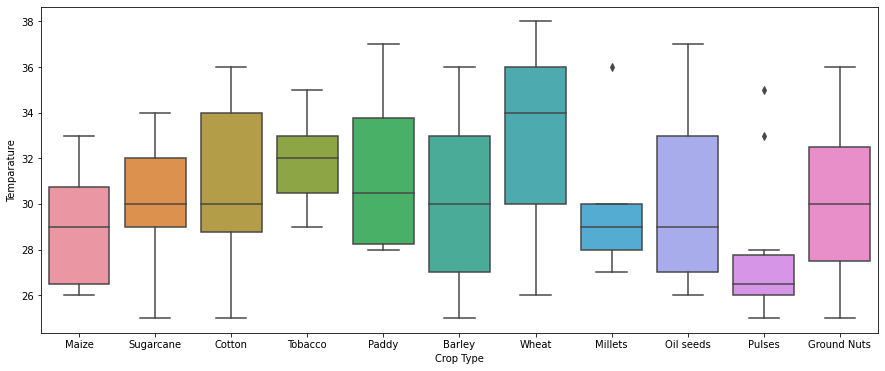

In [ ]:
#relation of crop type with temperature
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Crop Type'],y=df['Temparature'])

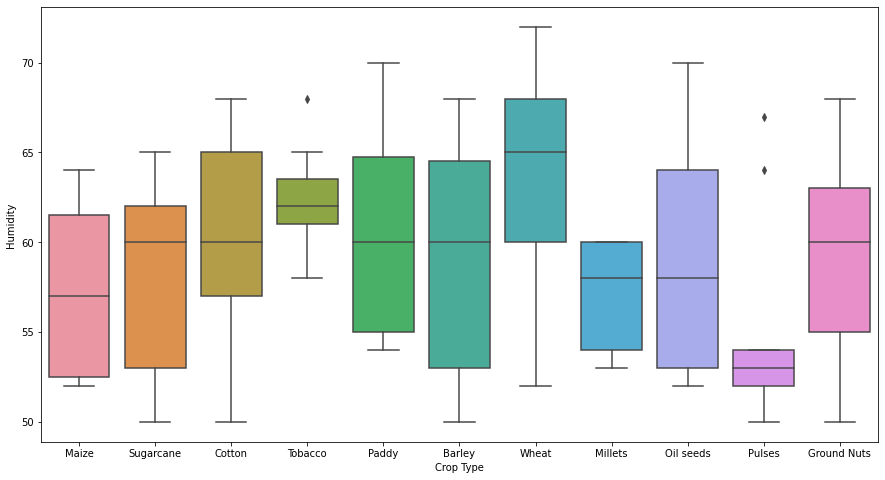

In [ ]:
#relation of crop type with Humidity
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Humidity '])

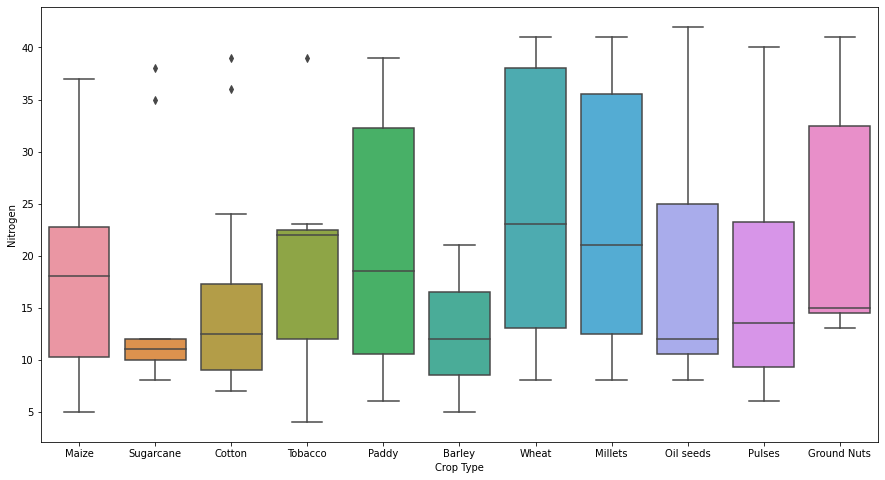

In [ ]:
#relation of nitrogen wrt to crop type
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Nitrogen'])

In [ ]:
y = df['Fertilizer Name'].copy()
X = df.drop('Fertilizer Name', axis=1).copy()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X[0]

array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 26.        , 52.        , 37.        ,  0.        ,
        0.        ,  7.21030646,  8.06666667])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[0]

array([-0.24806947, -0.33601075, -0.33601075, -0.17277369, -0.36214298,
       -0.24806947, -0.36214298,  3.24037035, -0.43549417, -0.24806947,
       -0.36214298, -1.50323411, -1.54242294,  0.46072126, -0.57643157,
        0.09092764, -0.17488826,  0.08483488])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print("pred:",y_pred)
print("act:",X_test)

pred: ['28-28' '20-20' '10/26/2026' 'Urea' 'DAP' '28-28' 'Urea' '28-28' 'DAP'
 'Urea' 'DAP' '28-28' '28-28' '14-35-14' 'DAP' 'Urea' 'DAP' 'Urea'
 '17-17-17' 'Urea' '14-35-14' '28-28' '10/26/2026' '17-17-17' 'DAP'
 '14-35-14' '14-35-14' 'Urea' '17-17-17' 'DAP']
act: [[-0.24806947  2.97609524 -0.33601075 -0.17277369 -0.36214298 -0.24806947
  -0.36214298 -0.3086067  -0.43549417 -0.24806947 -0.36214298  1.06134936
   0.9915576   0.46072126 -0.57643157  0.16743993 -0.39479653  0.48606229]
 [-0.24806947 -0.33601075 -0.33601075 -0.17277369 -0.36214298 -0.24806947
  -0.36214298  3.24037035 -0.43549417 -0.24806947 -0.36214298 -0.93332667
  -0.86669479 -0.49732651 -0.57643157 -0.36814607  1.09268654 -1.13024123]
 [-0.24806947 -0.33601075 -0.33601075 -0.17277369 -0.36214298 -0.24806947
  -0.36214298 -0.3086067  -0.43549417  4.03112887 -0.36214298 -0.07846552
   0.14689742 -1.28118377  2.51103066 -0.06209693 -2.10697179  0.21667837]
 [-0.24806947  2.97609524 -0.33601075 -0.17277369 -0.36214298 -0.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2 0 1 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 7 0]
 [0 0 0 0 0 0 7]]


0.9666666666666667

In [ ]:
classifier.score(X_test, y_test)

0.9666666666666667

In [ ]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder

encode_ferti = LabelEncoder()
df['Fertilizer Name'] = encode_ferti.fit_transform(df['Fertilizer Name'])

#creating the DataFrame
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
Fertilizer = Fertilizer.set_index('Original')
Fertilizer

,Encoded
Original,
10/26/2026,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [ ]:
encode_crop =  LabelEncoder()
df['Crop Type'] = encode_crop.fit_transform(df['Crop Type'])

#creating the DataFrame
Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
Crop_Type = Crop_Type.set_index('Original')
Crop_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Fertilizer Name',axis=1),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 8), y_train = (79,), x_test = (20, 8), y_test = (20,)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 2 to 37
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temparature  79 non-null     int64  
 1   Humidity     79 non-null     int64  
 2   Crop Type    79 non-null     int64  
 3   Nitrogen     79 non-null     int64  
 4   Potassium    79 non-null     int64  
 5   Phosphorous  79 non-null     int64  
 6   pH           79 non-null     float64
 7   Rainfall     79 non-null     float64
dtypes: float64(2), int64(6)
memory usage: 5.6 KB


In [ ]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
pred_rand = rand.predict(x_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,10,15],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   46.5s finished


              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Best score :  0.9871794871794872
Best params :  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 400}


In [ ]:
#pickling the file
import pickle
pickle_out = open('fert.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [ ]:
model = pickle.load(open('fert.pkl','rb'))
ans = model.predict([[34,65	,	1,	7,	9,	30,7.210306462,34.66666667]])
if ans[0] == 0:
    print("10-26-26")
elif ans[0] ==1:
    print("14-35-14")
elif ans[0] == 2:
    print("17-17-17	")
elif ans[0] == 3:
    print("20-20")
elif ans[0] == 4:
    print("28-28")
elif ans[0] == 5:
    print("DAP")
else:
    print("Urea")

14-35-14
